In [171]:
import numpy as np
import matplotlib.pyplot as plt
import os,shutil
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.preprocessing import image
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from keras.models import save_model

In [3]:
train_data_dir='C:\\ANN Mini Project\\animals\\animals\\train'
test_data_dir='C:\\ANN Mini Project\\animals\\animals\\val'
classes = os.listdir(train_data_dir)

In [4]:
classes

['cat', 'dog', 'elephant', 'horse', 'lion']

In [72]:
class_map=dict([(v,k) for k,v in train_data.class_indices.items()])
class_map

{0: 'cat', 1: 'dog', 2: 'elephant', 3: 'horse', 4: 'lion'}

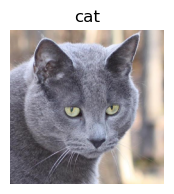

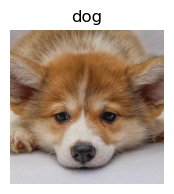

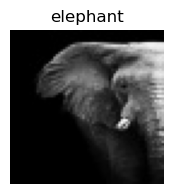

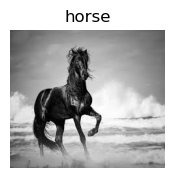

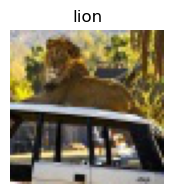

In [27]:
for i in classes:
    class_image_path = os.path.join(train_data_dir, i, random.choice(os.listdir(os.path.join(train_data_dir, i))))
    plt.figure(figsize=(2,2))
    image = plt.imread(class_image_path)
    plt.imshow(image)
    plt.title(i)
    plt.axis('off') 
    plt.show()

In [6]:
train_datagen = ImageDataGenerator(rescale = 1/255.,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True
                                  )

test_datagen = ImageDataGenerator(rescale = 1/255.)


train_data = train_datagen.flow_from_directory(train_data_dir,
                                              class_mode='categorical',
                                              target_size = (128,128),
                                              batch_size=32,
                                              shuffle=True)
test_data = test_datagen.flow_from_directory(test_data_dir,
                                              class_mode='categorical',
                                              target_size = (128,128),
                                              batch_size=32)

Found 13474 images belonging to 5 classes.
Found 1497 images belonging to 5 classes.


In [130]:

model_1 = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3)),    
    Conv2D(32,(3,3),activation='relu'),
    MaxPool2D(2),
    Dropout(0.5),
    Conv2D(64,(3,3),activation='relu',input_shape=(128,128,3)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPool2D(2),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(5,activation='softmax')
])


C:\Users\Atharva\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [132]:
model_1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 124, 124, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 58, 58, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 53824)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │     6,889,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,955,813 (26.53 MB)

 Trainable params: 6,955,813 (26.53 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model_1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
model_1.fit(train_data,epochs=10,validation_data=(test_data))

Epoch 1/10


C:\Users\Atharva\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


422/422 ━━━━━━━━━━━━━━━━━━━━ 319s 733ms/step - accuracy: 0.2685 - loss: 1.6724 - val_accuracy: 0.5030 - val_loss: 1.1129
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 266s 627ms/step - accuracy: 0.5931 - loss: 1.0363 - val_accuracy: 0.7221 - val_loss: 0.6844
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 201s 475ms/step - accuracy: 0.6994 - loss: 0.7566 - val_accuracy: 0.7722 - val_loss: 0.5917
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 216s 508ms/step - accuracy: 0.7552 - loss: 0.6226 - val_accuracy: 0.8063 - val_loss: 0.5322
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 284s 670ms/step - accuracy: 0.7750 - loss: 0.5705 - val_accuracy: 0.8310 - val_loss: 0.4476
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 261s 605ms/step - accuracy: 0.7920 - loss: 0.5261 - val_accuracy: 0.8604 - val_loss: 0.3902
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 193s 455ms/step - accuracy: 0.8304 - loss: 0.4388 - val_accuracy: 0.8804 - val_loss: 0.3392
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 193s 457ms/step - accuracy: 0.8385 - loss: 0.41

In [16]:
history=model_1.history.history


In [19]:
history

{'accuracy': [0.3593587577342987,
  0.6286922693252563,
  0.7138934135437012,
  0.7536737322807312,
  0.7832863330841064,
  0.8019148111343384,
  0.8269259333610535,
  0.8328632712364197,
  0.8474098443984985,
  0.8580228686332703],
 'loss': [1.4656835794448853,
  0.9422503113746643,
  0.7231989502906799,
  0.6216133236885071,
  0.543803870677948,
  0.4966721832752228,
  0.4411797523498535,
  0.41890081763267517,
  0.3935723304748535,
  0.3655480444431305],
 'val_accuracy': [0.5030060410499573,
  0.7221108675003052,
  0.7722110748291016,
  0.8062792420387268,
  0.8309953212738037,
  0.8603874444961548,
  0.8804275393486023,
  0.8777555227279663,
  0.8757514953613281,
  0.8563794493675232],
 'val_loss': [1.1129275560379028,
  0.6844054460525513,
  0.5917459726333618,
  0.53215092420578,
  0.44757166504859924,
  0.39023399353027344,
  0.33921608328819275,
  0.3502264618873596,
  0.354859322309494,
  0.36835116147994995]}

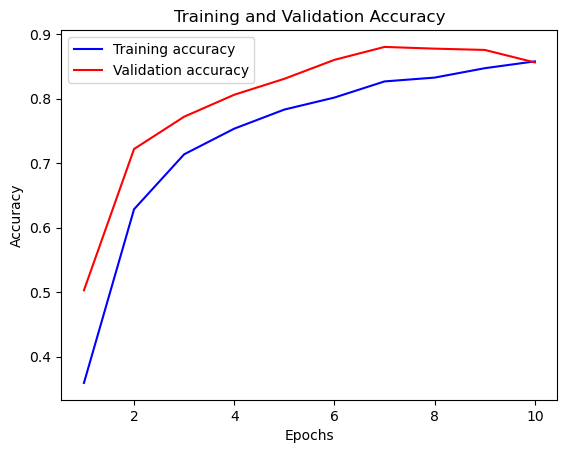

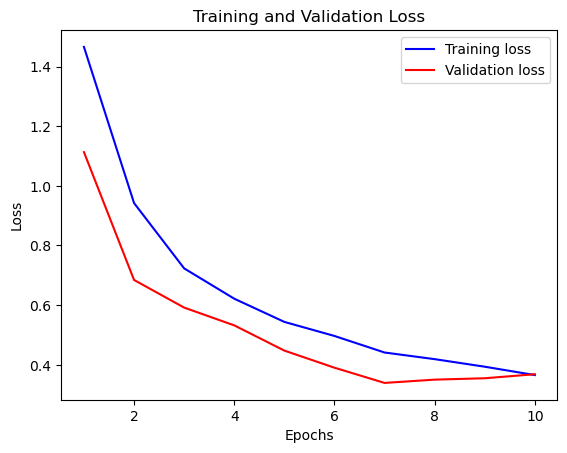

In [21]:

train_acc = history['accuracy']
test_acc = history['val_accuracy']
train_loss = history['loss']
test_loss = history['val_loss']

epochs = range(1, len(train_acc) + 1)


plt.plot(epochs, train_acc, 'b', label='Training accuracy')
plt.plot(epochs, test_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, test_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [22]:
model_2=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3)),
    MaxPool2D((2,2),2),
    Conv2D(32,(3,3),activation='relu'),
    MaxPool2D((2,2),2),
    Conv2D(64,(3,3),activation='relu'),
    Dropout(0.1),
    MaxPool2D((2,2),2),
    Flatten(),
    Dense(256,activation='relu'),
    Dropout(0.1),
    Dense(128,activation='relu'),
    Dense(5,activation='softmax')
])



C:\Users\Atharva\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [133]:
model_2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 61, 61, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     3,211,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,821,105 (37.46 MB)

 Trainable params: 3,273,701 (12.49 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,547,404 (24.98 MB)

In [164]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3,restore_best_weights=True)

In [165]:
model_2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [166]:
history2=model_2.fit(train_data,epochs=10,batch_size=32,validation_data=test_data,callbacks=[early_stopping_callback])

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 160s 370ms/step - accuracy: 0.8587 - loss: 0.3768 - val_accuracy: 0.8570 - val_loss: 0.3626
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 99s 232ms/step - accuracy: 0.8725 - loss: 0.3259 - val_accuracy: 0.8891 - val_loss: 0.2919
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 99s 234ms/step - accuracy: 0.8905 - loss: 0.2885 - val_accuracy: 0.8891 - val_loss: 0.2902
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 99s 232ms/step - accuracy: 0.8940 - loss: 0.2712 - val_accuracy: 0.9011 - val_loss: 0.2850
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 100s 236ms/step - accuracy: 0.9024 - loss: 0.2563 - val_accuracy: 0.8884 - val_loss: 0.3228
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 101s 236ms/step - accuracy: 0.9045 - loss: 0.2479 - val_accuracy: 0.8824 - val_loss: 0.3442
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 101s 237ms/step - accuracy: 0.9118 - loss: 0.2388 - val_accuracy: 0.8904 - val_loss: 0.3199


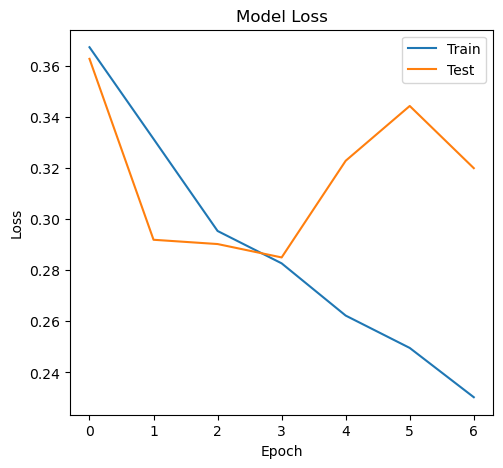

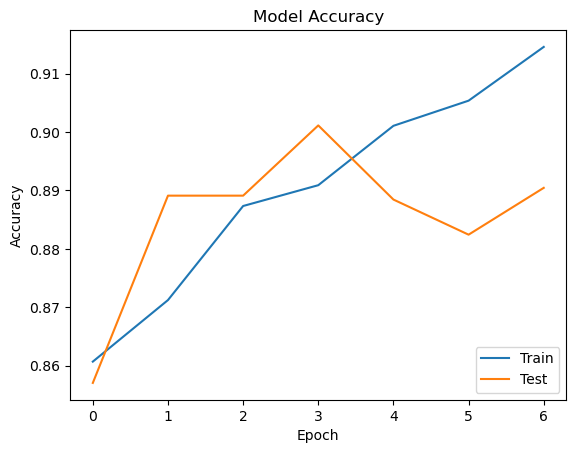

In [167]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()


plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='lower right')

plt.show()

In [38]:
model_1.evaluate(test_data)

47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 208ms/step - accuracy: 0.8594 - loss: 0.3636


[0.36835116147994995, 0.8563794493675232]

In [168]:
model_2.evaluate(test_data)

47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.9115 - loss: 0.2550


[0.28497374057769775, 0.9011356234550476]

In [123]:
def prediction(img_path,label,mod):
    img = image.load_img(img_path, target_size=(128, 128))
    img_arr = image.img_to_array(img) / 255.0
    img_arr_exp = np.expand_dims(img_arr, axis=0)
#     predi=(model_1.predict(img_arr_exp))
    predicted = np.argmax(mod.predict(img_arr_exp))
    predicted_label= class_map[predicted]
    plt.figure(figsize=(4, 4))
    plt.imshow(img_arr)
    plt.title("Predicted Label: {}, Actual Label: {}".format(predicted_label,label))
    plt.grid()
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


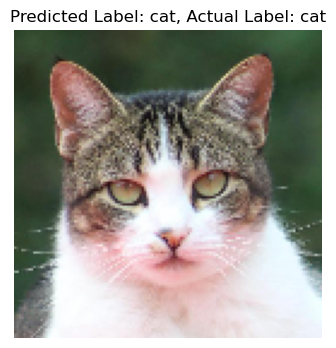

In [124]:
img_path="C:\ANN Mini Project\cat4.jpg"
prediction(img_path,'cat',model_1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


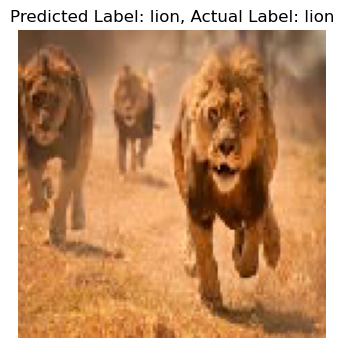

In [169]:
img_path="C:\ANN Mini Project\lion.jpg"
prediction(img_path,'lion',model_2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


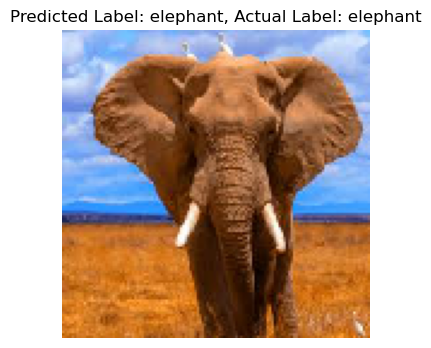

In [139]:
img_path="C:\\ANN Mini Project\\animals\\animals\\inf\\elephant\\elephant.jpg"
prediction(img_path,'elephant',model_2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


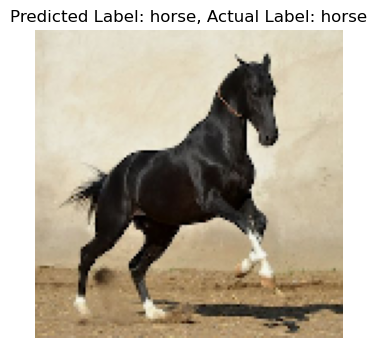

In [160]:
img_path="C:\\ANN Mini Project\\animals\\animals\\inf\\horse\\horse18.png"
prediction(img_path,'horse',model_2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


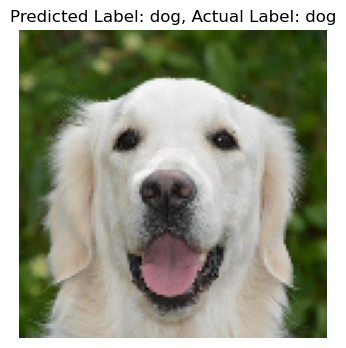

In [179]:
img_path="C:\\ANN Mini Project\\animals\\animals\\inf\\dog\\dog.jpg"
prediction(img_path,'dog',model_2)

In [173]:
model_2.save("my_cnn_model.h5")